## Show the relative decrease of the constraints on $\sigma_{\alpha}$ from the spec-z tracer due to the systematic effect from Psys. --03-24-2022

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys
from pathlib import Path

In [3]:
sys.path.append("/home/zjding/csst_bao/fisher_pkmu/")
from mcmc_funs import growth_factor
from astropy.table import Table

In [4]:
speed_c = 299792.458    # speed of light, km/s
Omega_m = 0.3075

Pspeczsys_list = ["1.0", "6.e2", "1.e3", "2.e3", "3.e3", "4.e3", "5.e3", "6.e3", "7.e3", "8.e3", "9.e3", "1.e4"]

survey_area = 17500.0
kmax = 0.3
kwidth = 0.005
zmin = 0.
zmax = 1.6
nzbins = 8
zbins = np.linspace(zmin, zmax, nzbins+1)

const_low = 0.99
const_up = 1.01

skyarea_total = 4*np.pi * (180./np.pi)**2.0
fsky = survey_area/skyarea_total
G_0 = growth_factor(0.0, Omega_m)       # G_0 at z=0, normalization factor 

# ## estimate the power spectrum damping parameter $\Sigma_{specz}$, $\Sigma_{pz}$ from the spec-z and photo-z uncertainty
sigma_specz = 0.002
#sigma_photoz = 0.05
sigma_photoz = 0.025
# Finger-of-God damping term
Sigma_fog = 7.0 

fsky_cosmos = 2.0/skyarea_total
fsky_zcosmos = 1.7/skyarea_total

In [5]:
idir0 = "/home/zjding/csst_bao/fisher_pkmu/BAO_part/Fisher_sigma_alphas/numerical_method/default/output/"

## only consider pre-recon case

In [6]:
##recon_dir_list = ["pre_recon", "post_recon"]
##text_list = ["Pre-recon", "Post-recon"]
recon_dir_list = ["pre_recon"]
text_list = [r"$D_\mathrm{A}(z)/r_\mathrm{d}$", r"$H(z)r_\mathrm{d}$"]
tracer = 'specz'
params_str = '11110101010101'

In [7]:
sigma_alpha_perp_all = []
sigma_alpha_para_all = []

for recon_dir in recon_dir_list:
    sigma_alpha_perp_list = []
    sigma_alpha_para_list = []
    for i, Pspecz_sys in enumerate(Pspeczsys_list):
        alpha_dir = idir0 + f"sigma_alpha/vary_params_{const_low}_{const_up}/Sigma_fog_{Sigma_fog}/{recon_dir}/k_width{kwidth}/Pspecz_sys{Pspecz_sys}/params_bf1.0/"
        
        filename = "sigma_alpha_{0}_tracer_zerror_specz{1:.3f}_photoz{2:.3f}_kmax{3:.2f}_params{4}.npz".format(tracer, sigma_specz, sigma_photoz, kmax, params_str)

        alpha_dir_temp = alpha_dir
        ifile = Path(alpha_dir, filename)
        data = np.load(ifile)
        sigma_alphas_mar = data['alphas_mar']

        sigma_alpha_perp_list.append(sigma_alphas_mar[:, 2])
        sigma_alpha_para_list.append(sigma_alphas_mar[:, 3])

    sigma_alpha_perp_all.append(sigma_alpha_perp_list)
    sigma_alpha_para_all.append(sigma_alpha_para_list)

In [8]:
sigma_alphas_mar

array([[ 0.        ,  0.2       ,  0.1503024 ,  0.31864223, -0.39940565],
       [ 0.2       ,  0.4       ,  0.05444854,  0.11761855, -0.39871422],
       [ 0.4       ,  0.6       ,  0.03359543,  0.07308732, -0.3979856 ],
       [ 0.6       ,  0.8       ,  0.02498533,  0.05432689, -0.39756847],
       [ 0.8       ,  1.        ,  0.02108539,  0.04538028, -0.39744989],
       [ 1.        ,  1.2       ,  0.02489059,  0.0508823 , -0.39749439],
       [ 1.2       ,  1.4       ,  0.05972233,  0.11046452, -0.39730974],
       [ 1.4       ,  1.6       ,  0.25377573,  0.44156025, -0.39712117]])

In [9]:
z_mid = (sigma_alphas_mar[:, 0] + sigma_alphas_mar[:, 1])/2.0
z_mid

array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5])

In [10]:
odir = "./figs/z{0:.1f}_{1:.1f}_{2}zbins/".format(zmin, zmax, nzbins)
if not os.path.exists(odir):
    os.makedirs(odir)

## Left is for $\sigma (\alpha_{\perp})$, and right is for $\sigma (\alpha_{\parallel})$

<Figure size 432x288 with 0 Axes>

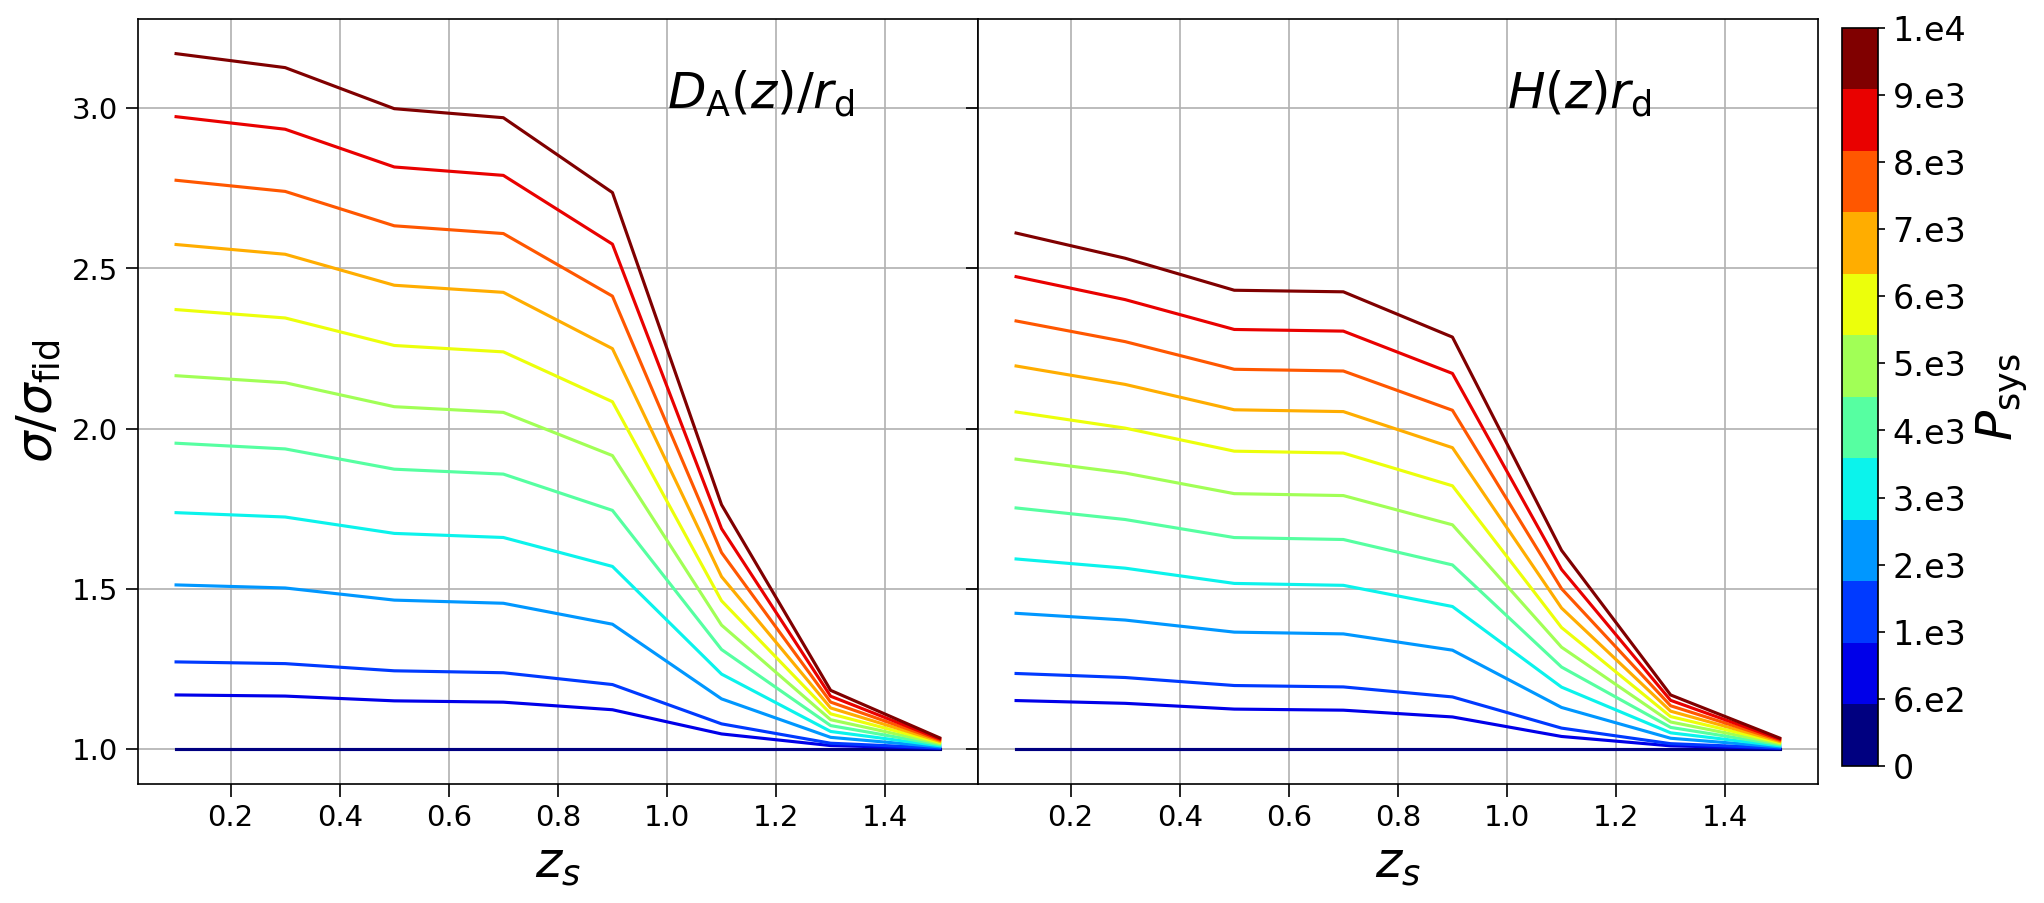

In [15]:
plt.clf()
cmap = plt.get_cmap('jet', len(Pspeczsys_list))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), dpi=150, sharey=True)
plt.subplots_adjust(
    left=0.15,
    bottom=0.15,
    right=0.85,
    top=1.0,
    wspace=0.,
    hspace=None,
)

for i, sigma_alpha_perp in enumerate(sigma_alpha_perp_all[0]):
    axes[0].plot(z_mid, sigma_alpha_perp/sigma_alpha_perp_all[0][0], color=cmap(i))

for i, sigma_alpha_para in enumerate(sigma_alpha_para_all[0]):
    axes[1].plot(z_mid, sigma_alpha_para/sigma_alpha_para_all[0][0], color=cmap(i))
    
# Normalizer
norm = mpl.colors.Normalize(vmin=0, vmax=1)
  
# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

## 4-tuple of floats *rect* = ``[left, bottom, width, height]``
cax = plt.axes([0.86, 0.17, 0.015, 0.82])

cbar = plt.colorbar(sm, cax=cax, ticks=np.linspace(0, 1, len(Pspeczsys_list)))
cbar.set_ticklabels([0]+Pspeczsys_list[1:], fontsize=16)
cbar.set_label(label=r"$P_{\mathrm{sys}}$", fontsize=24)

for i in range(2):
    axes[i].grid()
    axes[i].set_xlabel(r"$z_s$", fontsize=24)
    axes[i].tick_params(axis='both', which='major', length=6, labelsize=14)
    axes[i].tick_params(axis='both', which='minor', length=3, labelsize=12)
    axes[i].text(1.0, 3.0, text_list[i], fontsize=24)
axes[0].set_ylabel(r"$\sigma/\sigma_{\mathrm{fid}}$", fontsize=24)


for i in range(2):
    axes[i].tick_params(axis='both', which='major', length=6, labelsize=14)
    axes[i].tick_params(axis='both', which='minor', length=3, labelsize=12)
        
#plt.tight_layout()

filename = "sigma_DA_Hz_specz_diffPspeczsys.png"
ofile = odir + filename
plt.savefig(ofile)